# Random Forest
esto es un bosque de arboles que permite clasificar por caracteristica por separado, a diferencia de los decision tree que usa todas las caracteristicas (donde necesita las que más correlacion tienen)
esto genera un bosque de arboles de distintas caracteristicas y si la correlación es baja es mejor usar random forest que los arboles para generar un buen predicción
es decir:
- a mayor correlación mejor decision tree
- a menor correlación random forest

Para hacer una buena estimación de los hiperparametros hay que hacer un buscador de grilla
que es crear un diccionario,
donde se colocan los hyperparamentros con sus valores a evaluar
se importa la libreria de gridsearchCV
se envia el clasificador, los parametros, el CV y devuelve el score
luego se entrena con x_train e y_train 

Aunque se puede randomizar con randomizedsearchCV

## la receta

- Paso 0: Cargar los datos
- Paso 1: Entender los datos
    - Histogramas
    - Correlaciones (pandas tiene el método corr para facilitar esto)
    - Correlaciones agrupadas (sumar, restar, etc, columnas de características)
    - Graficar
    - Si hay columnas poco importantes, sacarlas
- Paso 2: Escalamiento/transformación de datos (si es que aplica)
    - Para categorías, en la mayoría de los casos deberías
        * Transformar esa categoría a número
        * Codificar esos números con un OneHotEncoder/parecido a dummies
    - El escalamiento se utiliza cuando tienes columnas con distintas escalas
- Paso 3: Dividir mi set de datos en entrenamiento y test (ojo, test no se toca sino hasta el final, para las pruebas)
- Paso 4: Decidimos/probamos cuál es el modelo que vamos a utilizar
    - Probar con varios modelos distintos y quedarte con el que tenga una métrica mejor 
    - También puedes probar el mismo modelo entrenado con distintos sub set de datos (gridsearch/randomsearch) para determinar hiper parámetros
- Paso 5: Testear mi modelo utilizando el set de test (set de pruebas)
- Paso 6: Entregar métricas o gráficas de comportamiento de tu modelo

# Ejercicio con la data del titanic
Usando decision tree y random forest determinar si el pasajero sobrevivio o no (clasificar)
hay que hacer optimización
metricas y reporte de clasificación 

## importando librerias
las de siempre
las de ML

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Cargando la data

In [ ]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_6/Data/titanic.csv'
titanic=pd.read_csv(archivo)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Revisando la data

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Existen datos NaN en la data
tanto en Age, en Cabin y en embarked
las que son tipo float se rellenará con los promedios
y en el caso de los objetos se revisaran los casos

In [ ]:
titanic.loc[titanic['Sex']=='female','Age']=titanic.loc[titanic['Sex']=='female','Age'].fillna(round(titanic['Age'].mean()))

In [ ]:
titanic.loc[titanic['Sex']=='male','Age']=titanic.loc[titanic['Sex']=='male','Age'].fillna(round(titanic['Age'].mean()))

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
titanic.loc[titanic['Cabin']=='C23 C25 C27',:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


In [ ]:
titanic.loc[0:31,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic.Cabin.fillna(method='bfill',inplace=True)

In [ ]:
titanic.loc[0:31,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,E46,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,G6,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,G6,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,G6,C


In [ ]:
titanic.Cabin.fillna(method='ffill',inplace=True)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.dropna(inplace=True)

Ya lista la limpieza, se procede ha eliminar el nombre y el ticket del registro porque son muy diversos

In [ ]:
titanic.drop(columns=['Name','Ticket'],inplace=True)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Cabin        889 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 76.4+ KB


## paso 1 entendiendo la data

In [ ]:
tiposdatos2=pd.DataFrame(titanic.dtypes) #Codigo mostrado en clases por un compañero
tiposdatos2.reset_index(inplace=True)
tiposdatos2

,index,0
0,PassengerId,int64
1,Survived,int64
2,Pclass,int64
3,Sex,object
4,Age,float64
5,SibSp,int64
6,Parch,int64
7,Fare,float64
8,Cabin,object
9,Embarked,object


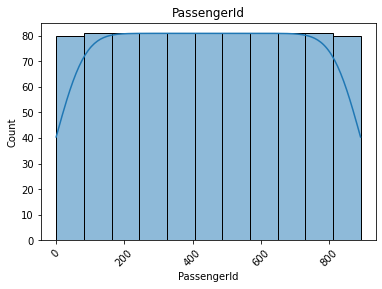

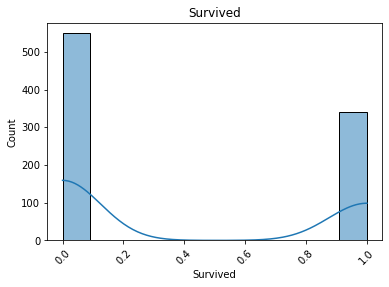

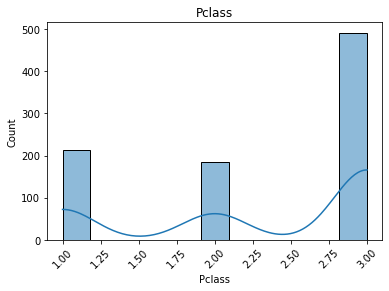

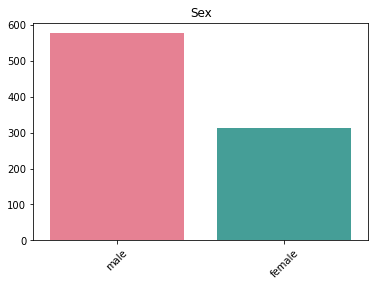

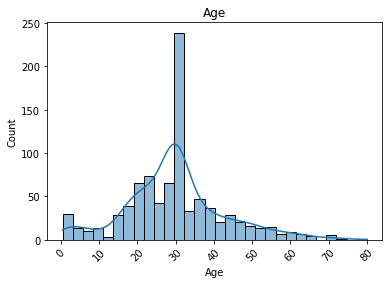

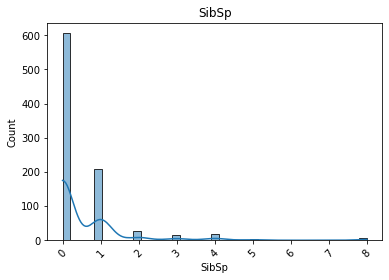

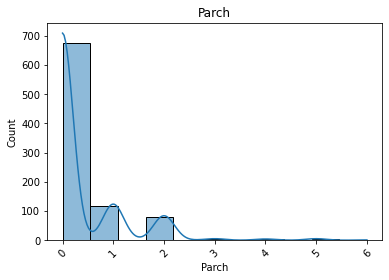

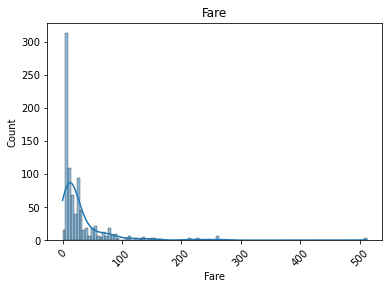

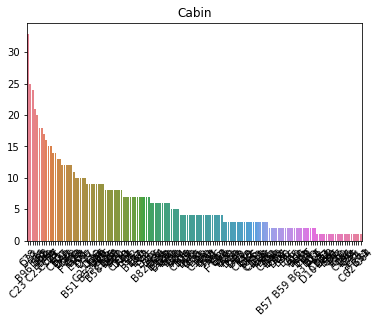

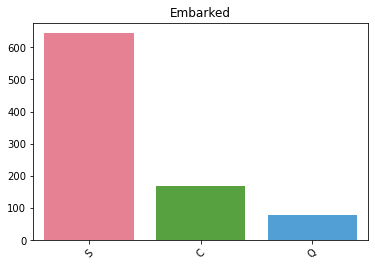

IndexError: index 10 is out of bounds for axis 0 with size 10

In [ ]:
for i in range(len(titanic.columns)):
        if titanic.dtypes[i] != 'object':
                sns.histplot(titanic[tiposdatos2['index'][i]],kde=True)
                plt.xticks(rotation=45)
                plt.title(tiposdatos2['index'][i])
                plt.show()
        else:
                obj=titanic[tiposdatos2['index'][i]].value_counts()
                sns.barplot(x=obj.index,y=obj.values,palette='husl')
                plt.xticks(rotation=45)
                plt.title(tiposdatos2['index'][i])
                plt.show()


Se puede apreciar que hay hartas columnas que son de categoricas que en realidad son numericas, pero hay que agregar las columnas de Sex, de embarked

En embarked

In [ ]:
from sklearn.preprocessing import LabelEncoder
etiq = LabelEncoder()
Label = etiq.fit_transform(titanic["Embarked"])
label_embarked = {index: label for index, label in 
                  enumerate(etiq.classes_)}
label_embarked

{0: 'C', 1: 'Q', 2: 'S'}

In [ ]:
titanic['Embarked']=Label

In [ ]:
titanic['Embarked'].value_counts()

2    644
0    168
1     77
Name: Embarked, dtype: int64

In [ ]:
titanic.nunique()

PassengerId    889
Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
Fare           247
Cabin          147
Embarked         3
dtype: int64

In [ ]:
for i in titanic.index:
  if titanic["Sex"][i]=="male":
    titanic["Sex"][i]=1
  elif titanic["Sex"][i]=="female":
    titanic["Sex"][i]=0


titanic["Sex"].value_counts()

1    577
0    312
Name: Sex, dtype: int64

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Cabin        889 non-null    object 
 9   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 108.7+ KB


In [ ]:
titanic['Sex']=pd.to_numeric(titanic['Sex'],errors='coerce')

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Cabin        889 non-null    object 
 9   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 108.7+ KB


## paso 3
Division de la data en train,test y valid

In [ ]:
X = titanic.drop(columns=["Survived",'Cabin'])
y = titanic["Survived"]


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)

## paso 4 y 5
los modelos

In [ ]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

Decision tree classifier

In [ ]:
for i in range (1, len(titanic.columns)):
    tree_clf = DecisionTreeClassifier(max_depth=i)
    tree_clf.fit(X_train, y_train)
    print('Profundidad', i)
    print('Accuracy', tree_clf.score(X_val, y_val))
  

Profundidad 1
Accuracy 0.7669172932330827
Profundidad 2
Accuracy 0.7669172932330827
Profundidad 3
Accuracy 0.7969924812030075
Profundidad 4
Accuracy 0.7593984962406015
Profundidad 5
Accuracy 0.7669172932330827
Profundidad 6
Accuracy 0.7969924812030075
Profundidad 7
Accuracy 0.7894736842105263
Profundidad 8
Accuracy 0.8195488721804511
Profundidad 9
Accuracy 0.7969924812030075


Validacion

In [ ]:
validacion_tree=tree_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, validacion_tree))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        86
           1       0.64      0.67      0.65        48

    accuracy                           0.75       134
   macro avg       0.72      0.73      0.73       134
weighted avg       0.75      0.75      0.75       134



Con random forest

In [ ]:
rndf_clf = RandomForestClassifier(n_estimators=300)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_val)

print(y_pred)
print(y_val.tolist())
rndf_clf.score(X_val, y_val)

[0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1
 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0]
[0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0]


0.8045112781954887

validacion

In [ ]:
validacion=rndf_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, validacion))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        86
           1       0.72      0.69      0.70        48

    accuracy                           0.79       134
   macro avg       0.77      0.77      0.77       134
weighted avg       0.79      0.79      0.79       134



Es mucho mejor random forest, tiene una tasa de recall más alta y mejor precisión

Grid search

In [ ]:
param_grid = [
    {'n_estimators':[10,50,100,150,200,250,300,350,400,450,500]}
]

forest_clf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                           400, 450, 500]}],
             return_train_score=True)

In [ ]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.81348387 0.81503226 0.81990968 0.82634839 0.82954839 0.83114839
 0.83116129 0.82476129 0.82796129 0.82954839 0.82954839] [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 150}, {'n_estimators': 200}, {'n_estimators': 250}, {'n_estimators': 300}, {'n_estimators': 350}, {'n_estimators': 400}, {'n_estimators': 450}, {'n_estimators': 500}]


---
Ejercicio 2
data de glass

In [ ]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_6/Data/glass.csv'
glass=pd.read_csv(archivo)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Revisando la data

In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Esta limpio el data
busqueda de duplicados

In [ ]:
glass.drop_duplicates(inplace=True)

In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


Solo habia un duplicado

In [ ]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


Hay correlaciones bastante bajas en la gran mayoria de los casos, excepto para contados casos
Es muy probable que random forest sea mejor que decision tree

In [ ]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
tiposdatos2=pd.DataFrame(glass.dtypes) #Codigo mostrado en clases por un compañero
tiposdatos2.reset_index(inplace=True)
tiposdatos2

,index,0
0,RI,float64
1,Na,float64
2,Mg,float64
3,Al,float64
4,Si,float64
5,K,float64
6,Ca,float64
7,Ba,float64
8,Fe,float64
9,Type,int64


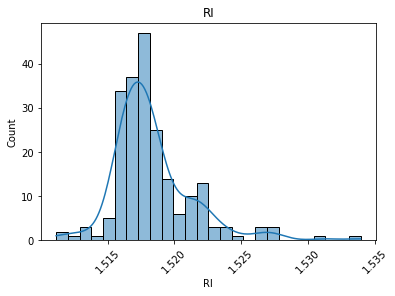

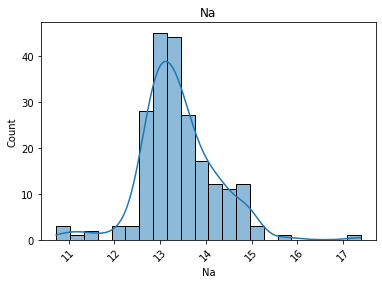

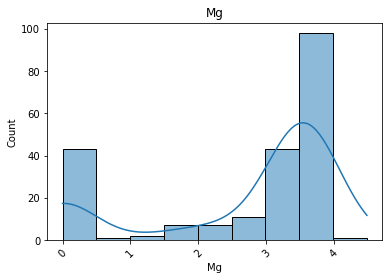

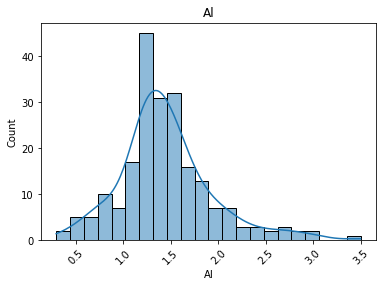

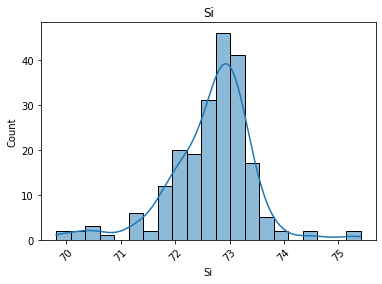

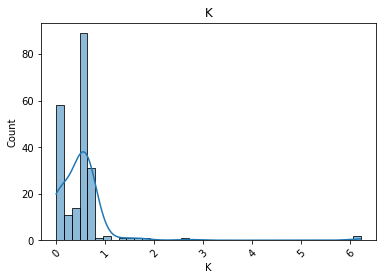

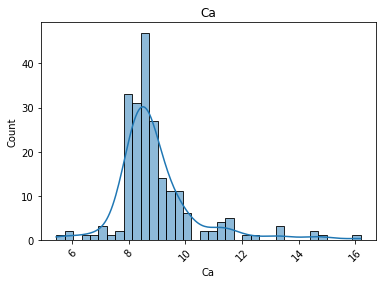

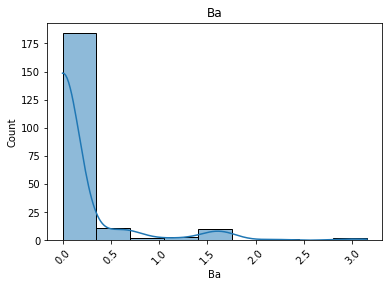

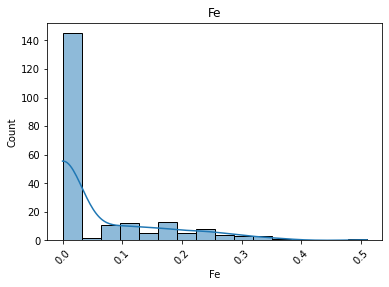

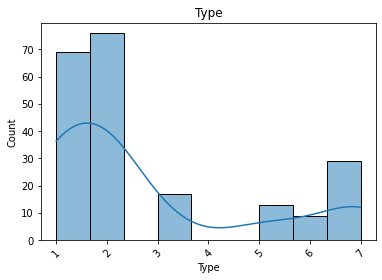

In [ ]:
for i in range(len(glass.columns)):
        if glass.dtypes[i] != 'object':
                sns.histplot(glass[tiposdatos2['index'][i]],kde=True)
                plt.xticks(rotation=45)
                plt.title(tiposdatos2['index'][i])
                plt.show()
        else:
                obj=glass[tiposdatos2['index'][i]].value_counts()
                sns.barplot(x=obj.index,y=obj.values,palette='husl')
                plt.xticks(rotation=45)
                plt.title(tiposdatos2['index'][i])
                plt.show()

Hay desbalanceo de clases en Type

Dividiendo el data

In [ ]:
X = glass.drop(columns=["Type"])
y = glass["Type"]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5,stratify=y_val)

Train para entrenar
val para optimizar
test para probar el modelo con los mejores parametros de la optimización

### Decision tree

Con el accuracy

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=6)
tree_clf.fit(X_train, y_train)
#print('Profundidad', i)
print('Accuracy', tree_clf.score(X_val, y_val))

Accuracy 0.6875


In [ ]:
param_grid = [
    {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
]

arbol_clf = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(arbol_clf, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True)

In [ ]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.45655172 0.59057471 0.62390805 0.66436782 0.6845977  0.69103448
 0.67770115 0.67126437 0.6645977  0.6445977 ] [{'max_depth': 1}, {'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}, {'max_depth': 10}]


validando el modelo

In [ ]:
validacion_tree=tree_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, validacion_tree))

              precision    recall  f1-score   support

           1       0.60      0.60      0.60        10
           2       0.70      0.58      0.64        12
           3       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         5

    accuracy                           0.72        32
   macro avg       0.74      0.86      0.78        32
weighted avg       0.73      0.72      0.72        32



### random forest

In [ ]:
rndf_clf = RandomForestClassifier(n_estimators=150)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_val)

print(y_pred)
print(y_val.tolist())
rndf_clf.score(X_val, y_val)

[1 2 5 2 1 5 7 1 1 7 7 1 1 1 2 6 2 1 7 2 1 2 2 2 1 2 1 2 6 1 7 1]
[1, 1, 5, 2, 3, 2, 7, 1, 1, 7, 7, 2, 1, 2, 3, 2, 2, 1, 5, 2, 1, 2, 2, 2, 1, 1, 1, 2, 6, 3, 7, 1]


0.6875

In [ ]:
param_grid = [
    {'n_estimators':[10,50,100,150,200,250,300,350,400,450,500]}
]

forest_clf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                           400, 450, 500]}],
             return_train_score=True)

In [ ]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.72528736 0.76505747 0.77862069 0.78574713 0.76528736 0.7783908
 0.76528736 0.77195402 0.76505747 0.77195402 0.77862069] [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 150}, {'n_estimators': 200}, {'n_estimators': 250}, {'n_estimators': 300}, {'n_estimators': 350}, {'n_estimators': 400}, {'n_estimators': 450}, {'n_estimators': 500}]


In [ ]:
validacion=rndf_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, validacion))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80        10
           2       0.75      0.75      0.75        12
           3       1.00      0.50      0.67         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5

    accuracy                           0.81        32
   macro avg       0.87      0.84      0.84        32
weighted avg       0.82      0.81      0.81        32



In [ ]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.72528736 0.76505747 0.77862069 0.78574713 0.76528736 0.7783908
 0.76528736 0.77195402 0.76505747 0.77195402 0.77862069] [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 150}, {'n_estimators': 200}, {'n_estimators': 250}, {'n_estimators': 300}, {'n_estimators': 350}, {'n_estimators': 400}, {'n_estimators': 450}, {'n_estimators': 500}]


In [ ]:
validacion=rndf_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, validacion))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80        10
           2       0.75      0.75      0.75        12
           3       1.00      0.50      0.67         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5

    accuracy                           0.81        32
   macro avg       0.87      0.84      0.84        32
weighted avg       0.82      0.81      0.81        32



### knn

para knn se necesita escalar los datos

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val=scaler.transform(X_val)

In [ ]:
#while (accuracy<=0.5):
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
predictions = knn.predict(X_val)
accuracy=knn.score(X_val, y_val)
print('Accuracy:',accuracy)

Accuracy: 0.5625


In [ ]:
from sklearn.metrics import recall_score
recall=0
k=1
aux=0
aux1=0
while(recall<=0.8): #Esto sirve para aumentar el recall
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  predictions = knn.predict(X_val)
  recall=recall_score(y_val, predictions, average="macro")
  if (recall==aux): #si el recall es igual al aux, suma en aux1
    aux1=aux1+1
  aux=recall
  if (aux1==3): #si se repite 5 veces el valor, agranda el K
    k=k+1
    aux1=0
  if (k==len(X_train)): # si k llega a ser la cantidad de datos, rompe el ciclo
    break
  print(recall)

0.6388888888888888
0.6388888888888888
0.6388888888888888
0.6388888888888888
0.44696969696969696
0.44696969696969696
0.44696969696969696
0.44696969696969696
0.3636363636363636
0.3636363636363636
0.3636363636363636
0.3636363636363636
0.37878787878787873
0.37878787878787873
0.37878787878787873
0.37878787878787873
0.49242424242424243
0.49242424242424243
0.49242424242424243
0.49242424242424243
0.37878787878787873
0.37878787878787873
0.37878787878787873
0.37878787878787873
0.3636363636363636
0.3636363636363636
0.3636363636363636
0.3636363636363636
0.32196969696969696
0.32196969696969696
0.32196969696969696
0.32196969696969696
0.3371212121212121
0.3371212121212121
0.3371212121212121
0.3371212121212121
0.32196969696969696
0.32196969696969696
0.32196969696969696
0.32196969696969696
0.37878787878787873
0.37878787878787873
0.37878787878787873
0.37878787878787873
0.37878787878787873
0.37878787878787873
0.37878787878787873
0.393939393939394
0.393939393939394
0.393939393939394
0.393939393939394
0.35

Validando el modelo

In [ ]:
predictions = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.38      1.00      0.55        12
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         5

    accuracy                           0.38        32
   macro avg       0.06      0.17      0.09        32
weighted avg       0.14      0.38      0.20        32



/Users/matiasinostrozacifuentes/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Con escalamiento en decision tree y random forest

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val=scaler.transform(X_val)

Decision tree

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=6)
tree_clf.fit(X_train, y_train)
print('Accuracy', tree_clf.score(X_val, y_val))

Accuracy 0.59375


In [ ]:
param_grid = [
    {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
]

arbol_clf = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(arbol_clf, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True)

In [ ]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params']) 

[0.45655172 0.58390805 0.61724138 0.65747126 0.67126437 0.67103448
 0.67770115 0.69103448 0.65103448 0.67126437] [{'max_depth': 1}, {'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}, {'max_depth': 10}]


In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=8)
tree_clf.fit(X_train, y_train)
print('Accuracy', tree_clf.score(X_val, y_val))

Accuracy 0.625


Validando

In [ ]:
validacion_tree=tree_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, validacion_tree))

              precision    recall  f1-score   support

           1       0.67      0.80      0.73        10
           2       0.75      0.50      0.60        12
           3       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       0.50      1.00      0.67         1
           7       0.80      0.80      0.80         5

    accuracy                           0.72        32
   macro avg       0.73      0.85      0.77        32
weighted avg       0.73      0.72      0.71        32



Random forest

In [ ]:
rndf_clf = RandomForestClassifier(n_estimators=150)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_val)

print(y_pred)
print(y_val.tolist())
rndf_clf.score(X_val, y_val)

[1 2 5 2 1 5 7 1 1 7 7 1 1 2 2 6 2 1 7 2 1 2 2 2 1 2 1 2 1 1 7 1]
[1, 1, 5, 2, 3, 2, 7, 1, 1, 7, 7, 2, 1, 2, 3, 2, 2, 1, 5, 2, 1, 2, 2, 2, 1, 1, 1, 2, 6, 3, 7, 1]


0.6875

In [ ]:
param_grid = [
    {'n_estimators':[10,50,100,150,200,250,300,350,400,450,500]}
]

forest_clf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                           400, 450, 500]}],
             return_train_score=True)

In [ ]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.75172414 0.78482759 0.7983908  0.79862069 0.79862069 0.80528736
 0.79862069 0.79862069 0.79172414 0.7983908  0.80528736] [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 150}, {'n_estimators': 200}, {'n_estimators': 250}, {'n_estimators': 300}, {'n_estimators': 350}, {'n_estimators': 400}, {'n_estimators': 450}, {'n_estimators': 500}]


In [ ]:
rndf_clf = RandomForestClassifier(n_estimators=250)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_val)

print(y_pred)
print(y_val.tolist())
rndf_clf.score(X_val, y_val)

[1 2 5 2 1 5 7 1 1 7 7 1 1 2 2 6 2 1 7 2 1 2 2 2 1 2 1 2 6 1 7 1]
[1, 1, 5, 2, 3, 2, 7, 1, 1, 7, 7, 2, 1, 2, 3, 2, 2, 1, 5, 2, 1, 2, 2, 2, 1, 1, 1, 2, 6, 3, 7, 1]


0.71875

validando

In [ ]:
validacion=rndf_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, validacion))

              precision    recall  f1-score   support

           1       0.89      0.80      0.84        10
           2       0.83      0.83      0.83        12
           3       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5

    accuracy                           0.88        32
   macro avg       0.90      0.94      0.91        32
weighted avg       0.88      0.88      0.88        32



Ocupando el grid en knn

In [ ]:
#while (accuracy<=0.5):
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
predictions = knn.predict(X_val)
accuracy=knn.score(X_val, y_val)
print('Accuracy:',accuracy)

Accuracy: 0.5625


In [ ]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/Users/matiasinostrozacifuentes/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=148),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [ ]:
cvres = grid.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.71666667 0.70428571 0.69714286 0.69095238 0.6647619  0.63761905
 0.63142857 0.61809524 0.61761905 0.63095238 0.64428571 0.65142857
 0.61761905 0.63095238 0.63761905 0.62380952 0.63095238 0.64428571
 0.61761905 0.61761905 0.62428571 0.61761905 0.61095238 0.61095238
 0.58428571 0.57095238 0.57761905 0.57761905 0.58428571 0.58428571] [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}, {'n_neighbors': 20}, {'n_neighbors': 21}, {'n_neighbors': 22}, {'n_neighbors': 23}, {'n_neighbors': 24}, {'n_neighbors': 25}, {'n_neighbors': 26}, {'n_neighbors': 27}, {'n_neighbors': 28}, {'n_neighbors': 29}, {'n_neighbors': 30}]


In [ ]:

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
predictions = knn.predict(X_val)
accuracy=knn.score(X_val, y_val)
print('Accuracy:',accuracy)

Accuracy: 0.5625


In [ ]:
predictions = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.70      0.70      0.70        10
           2       0.73      0.67      0.70        12
           3       0.50      0.50      0.50         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5

    accuracy                           0.75        32
   macro avg       0.77      0.81      0.78        32
weighted avg       0.75      0.75      0.75        32

